# Öğrenci Bilgileri
* **Adı:** ibrahim
* **Soyadı:** kahraman
* **Okul Numarası:** 2212729009
* **GitHub Repo Bağlantısı:** https://github.com/ibrahimkahramann/CNN-Image-Classification-Project

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import numpy as np


PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/CNN-Image-Classification-Project"

DATASET_PATH = os.path.join(PROJECT_PATH, "dataset")

IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

BATCH_SIZE = 16

print("Kütüphaneler yüklendi ve ayarlar yapıldı.")
print(f"TensorFlow Versiyonu: {tf.__version__}")
print(f"Veri Seti Yolu: {DATASET_PATH}")

Kütüphaneler yüklendi ve ayarlar yapıldı.
TensorFlow Versiyonu: 2.19.0
Veri Seti Yolu: /content/drive/MyDrive/Colab Notebooks/CNN-Image-Classification-Project/dataset


In [19]:
print("Eğitim seti yükleniyor...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

print("\nDoğrulama (Test) seti yükleniyor...")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

class_names = train_dataset.class_names
print("\nBulunan sınıflar:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("\nEğitim ve Doğrulama setleri başarıyla oluşturuldu ve optimize edildi.")

Eğitim seti yükleniyor...
Found 128 files belonging to 2 classes.
Using 103 files for training.

Doğrulama (Test) seti yükleniyor...
Found 128 files belonging to 2 classes.
Using 25 files for validation.

Bulunan sınıflar: ['fork', 'spoon']

Eğitim ve Doğrulama setleri başarıyla oluşturuldu ve optimize edildi.


/tmp/ipython-input-1769317596.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(labels[i].numpy())


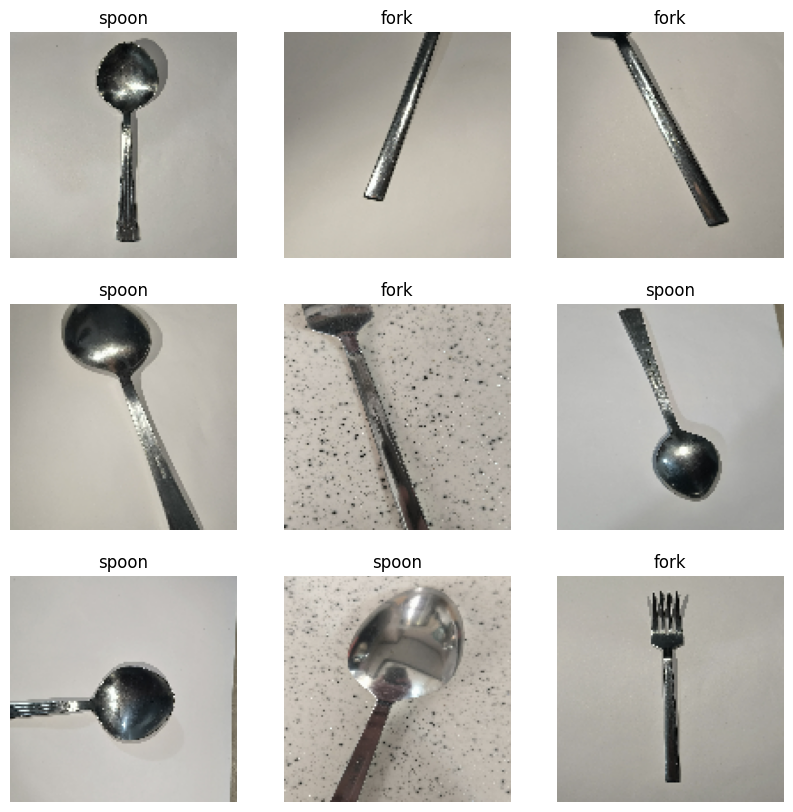

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    label_index = int(labels[i].numpy())
    plt.title(class_names[label_index])
    plt.axis("off")

In [21]:
model = tf.keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model 2 (Temel CNN) Mimarisi:")
model.summary()

Model 2 (Temel CNN) Mimarisi:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,809 (16.36 MB)

 Trainable params: 4,287,809 (16.36 MB)

 Non-trainable params: 0 (0.00 B)


Model 2 eğitimi başlıyor...
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5575 - loss: 1.0266 - val_accuracy: 0.7200 - val_loss: 0.6395
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - accuracy: 0.4107 - loss: 0.7165 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.6582 - loss: 0.6915 - val_accuracy: 0.2800 - val_loss: 0.6985
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.5719 - loss: 0.6887 - val_accuracy: 0.2800 - val_loss: 0.6980
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.6399 - loss: 0.6842 - val_accuracy: 0.5200 - val_loss: 0.6924
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.6943 - loss: 0.6773 - val_accuracy: 0.5200 - val_loss: 0.6915
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.7277 - loss: 0.6587 - val_accuracy: 0.6800 - val_loss: 0.6665
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.6742 - loss: 0.6282 - val_ac

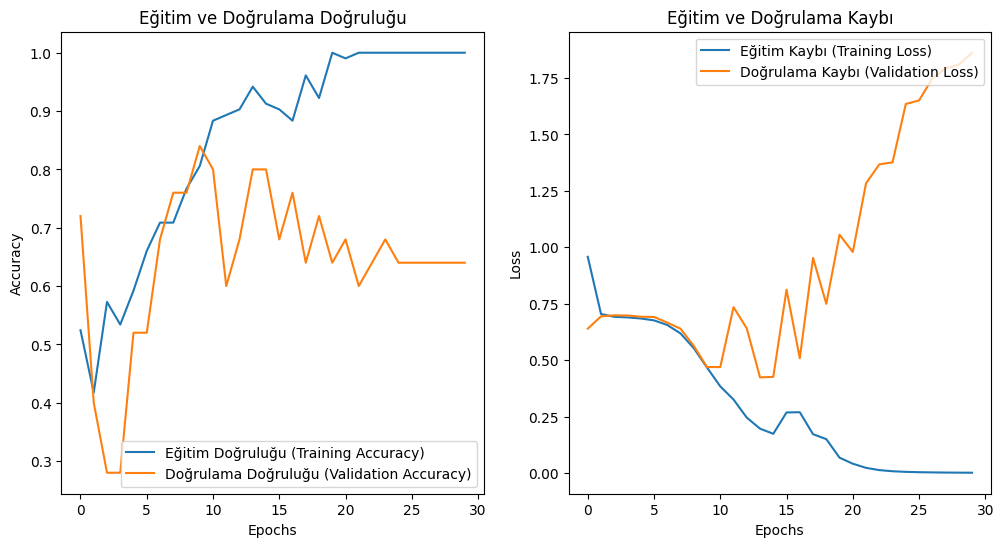


--- Test Seti Değerlendirmesi ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6350 - loss: 1.8235
Modelin Test Doğruluğu (Validation Accuracy): 64.00%


In [22]:
EPOCHS = 30

print("\nModel 2 eğitimi başlıyor...")
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset
)
print("Model 2 eğitimi tamamlandı.")

print("\n--- Eğitim Sonuç Grafikleri ---")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu (Training Accuracy)')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu (Validation Accuracy)')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Training Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Validation Loss)')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print("\n--- Test Seti Değerlendirmesi ---")
test_loss, test_accuracy = model.evaluate(validation_dataset)
print(f"Modelin Test Doğruluğu (Validation Accuracy): {test_accuracy * 100:.2f}%")


--- Hata Analizi: Model 2 Nerede Yanıldı? ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Model toplam 25 fotoğraftan 9 adetinde hata yaptı.
Hatalı tahminler aşağıda gösteriliyor...


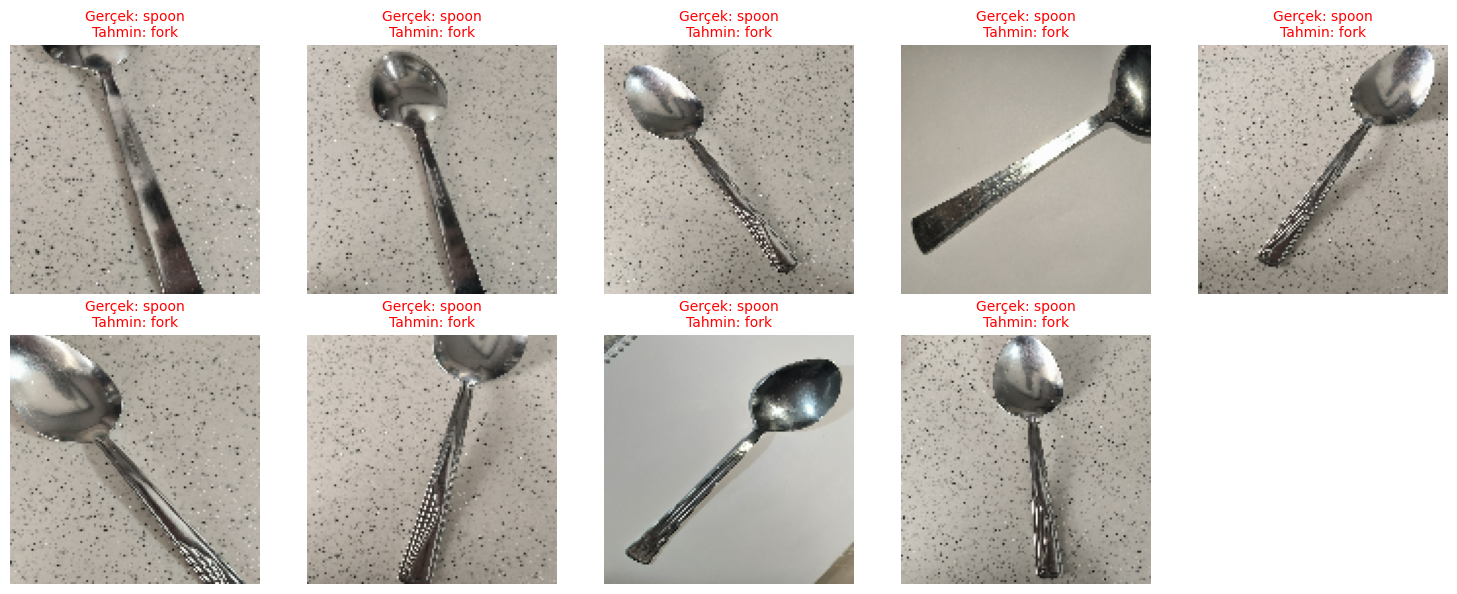

In [23]:
print("\n--- Hata Analizi: Model 2 Nerede Yanıldı? ---")

validation_images = []
validation_labels = []

for images, labels in validation_dataset:
    validation_images.append(images.numpy())
    validation_labels.append(labels.numpy())

validation_images = np.concatenate(validation_images, axis=0)
validation_labels = np.concatenate(validation_labels, axis=0).flatten()

predictions_raw = model.predict(validation_images)
predicted_classes = (predictions_raw > 0.5).astype(int).flatten()
true_classes = validation_labels.astype(int)

mismatched_indices = np.where(predicted_classes != true_classes)[0]

if len(mismatched_indices) == 0:
    print("🎉 Harika! Model, doğrulama setindeki hiçbir fotoğrafta hata yapmadı.")
else:
    print(f"Model toplam {len(true_classes)} fotoğraftan {len(mismatched_indices)} adetinde hata yaptı.")
    print("Hatalı tahminler aşağıda gösteriliyor...")

    plt.figure(figsize=(15, 6))
    plot_count = min(len(mismatched_indices), 10)

    for i in range(plot_count):
        plt.subplot(2, 5, i + 1)
        idx = mismatched_indices[i]

        plt.imshow(validation_images[idx].astype("uint8"))
        plt.axis('off')

        true_label = class_names[true_classes[idx]]
        pred_label = class_names[predicted_classes[idx]]

        plt.title(f"Gerçek: {true_label}\nTahmin: {pred_label}", color='red', fontsize=10)

    plt.tight_layout()
    plt.show()